In [1]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
dataset_train = pd.read_csv('Train.csv')
dataset_test = pd.read_csv('Test.csv')

In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dataset_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dataset_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


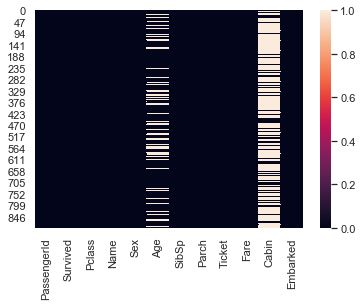

In [6]:
sns.heatmap(dataset_train.isnull())

In [7]:
def nullset(cols):
    age= cols[0]
    pclass= cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        elif pclass ==3:
            return 25
        else:
            return 30
    else:
        return age

In [8]:
dataset_train['Age']= dataset_train[['Age','Pclass']].apply(nullset,axis=1)

In [9]:
def nullset(cols):
    age= cols[0]
    pclass= cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        elif pclass ==3:
            return 25
        else:
            return 30
    else:
        return age

In [10]:
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
dataset_test['Age']= dataset_test[['Age','Pclass']].apply(nullset,axis=1)

In [12]:
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S


In [13]:
dataset_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


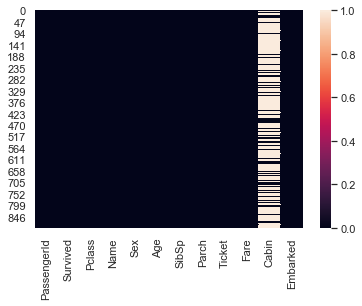

In [14]:
sns.heatmap(dataset_train.isnull())

In [15]:
dataset_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [16]:
dataset_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
dataset_train.drop('Name',axis=1, inplace=True)
dataset_test.drop('Name',axis=1, inplace=True)

In [18]:
dataset_train.drop('Ticket',axis=1, inplace=True)
dataset_test.drop('Ticket',axis=1, inplace=True)

In [19]:
dataset_train.drop('Cabin',axis=1, inplace=True)
dataset_test.drop('Cabin',axis=1, inplace=True)

In [20]:
dataset_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,25.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [21]:
dataset_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,25.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,25.0,0,0,8.0500,S


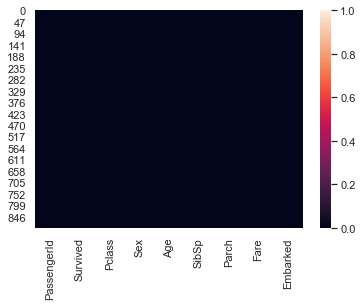

In [22]:
sns.heatmap(dataset_train.isnull())

In [23]:
Pclass = dataset_train['Pclass']
Pclass = pd.get_dummies(Pclass, drop_first=True)

In [24]:
Pclass1 = dataset_test['Pclass']
Pclass1 = pd.get_dummies(Pclass1, drop_first=True)

In [25]:
sex = dataset_train['Sex']
sex = pd.get_dummies(sex, drop_first=True)

In [26]:
sex1 = dataset_test['Sex']
sex1 = pd.get_dummies(sex1, drop_first=True)

In [27]:
SibSp = dataset_train['SibSp']
SibSp = pd.get_dummies(SibSp, drop_first=True)

In [28]:
SibSp1 = dataset_test['SibSp']
SibSp1 = pd.get_dummies(SibSp1, drop_first=True)

In [29]:
Parch = dataset_train['Parch']
Parch = pd.get_dummies(Parch, drop_first=True)

In [30]:
Parch1 = dataset_test['Parch']
Parch1 = pd.get_dummies(Parch1, drop_first=True)

In [31]:
Embarked = dataset_train['Embarked']
Embarked = pd.get_dummies(Embarked, drop_first=True)

In [32]:
Embarked1 = dataset_test['Embarked']
Embarked1 = pd.get_dummies(Embarked1, drop_first=True)

In [33]:
X = pd.concat([dataset_train['PassengerId'],dataset_train['Age'],dataset_train['Fare'],Pclass,sex,SibSp,Parch,Embarked],axis=1)

In [34]:
Parch

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,0,1,0,0,0,0
889,0,0,0,0,0,0


In [35]:
lol = Parch1.drop(9,axis=1)

In [36]:
lol

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
413,0,0,0,0,0,0
414,0,0,0,0,0,0
415,0,0,0,0,0,0
416,0,0,0,0,0,0


In [37]:
X_test = pd.concat([dataset_test['PassengerId'],dataset_test['Age'],dataset_test['Fare'],Pclass1,sex1,SibSp1,lol,Embarked1],axis=1)

In [38]:
X

,PassengerId,Age,Fare,2,3,male,1,2,3,4,5,8,1,2,3,4,5,6,Q,S
0,1,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,13.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,888,19.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,889,25.0,23.4500,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,890,26.0,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
X_test

,PassengerId,Age,Fare,2,3,male,1,2,3,4,5,8,1,2,3,4,5,6,Q,S
0,892,34.5,7.8292,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,893,47.0,7.0000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,894,62.0,9.6875,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,895,27.0,8.6625,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,896,22.0,12.2875,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,25.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
414,1306,39.0,108.9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,1307,38.5,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
416,1308,25.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
y = dataset_train['Survived']

In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
from keras.models import Sequential

Using TensorFlow backend.


In [43]:
model = Sequential()

In [44]:
from keras.layers import Dense

In [45]:
from keras.optimizers import Adam

In [46]:
model.add(Dense(units=6, input_dim=20,activation='relu'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 126       
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.add(Dense(units=4,activation='relu'))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.add(Dense(units=2,activation='relu'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.add(Dense(units=1,activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model.fit(X,y,epochs=70)

Epoch 1/70
891/891 [==============================] - 0s 186us/step - loss: 0.6858 - accuracy: 0.5780
Epoch 2/70
891/891 [==============================] - 0s 39us/step - loss: 0.6716 - accuracy: 0.6162
Epoch 3/70
891/891 [==============================] - 0s 44us/step - loss: 0.6671 - accuracy: 0.6162
Epoch 4/70
891/891 [==============================] - 0s 56us/step - loss: 0.6667 - accuracy: 0.6162
Epoch 5/70
891/891 [==============================] - 0s 58us/step - loss: 0.6661 - accuracy: 0.6162
Epoch 6/70
891/891 [==============================] - 0s 55us/step - loss: 0.6661 - accuracy: 0.6162
Epoch 7/70
891/891 [==============================] - 0s 56us/step - loss: 0.6660 - accuracy: 0.6162
Epoch 8/70
891/891 [==============================] - 0s 53us/step - loss: 0.6660 - accuracy: 0.6162
Epoch 9/70
891/891 [==============================] - 0s 48us/step - loss: 0.6660 - accuracy: 0.6162
Epoch 10/70
891/891 [==============================] - 0s 44us/step - loss: 0.6662 - accur

In [56]:
model.predict(X_test)

array([[0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
       [0.3839797],
